## Assignment:Apply Naive Bayes on Amazon reviews data-set [M]


Given Dataset consists of reviews of fine foods from amazon. Reviews describe (1)product and user information, (2)ratings, and (3) a plain text review.Naive Bayes works on Bayes theorem of probability to predict the class of unknown data set.Here, Naive Bayes algorithm is applied on amazon reviews datasets to classify postive and negative reviews.

Procedure to execute the above task is as follows:

         

## Objective:

* To classify given reviews (positive (Rating of 4 or 5) & negative (rating of 1 or 2)) using Naives Bayes  algorithm.







* Step1: Data Pre-processing is applied on given amazon reviews data-set.And Take sample of data from dataset because of computational limitations
* Step2: Time based splitting on train and test datasets.
* Step3: Apply  Feature generation techniques(Bow,tfidf,avg w2v,tfidfw2v) 
* Step4: Apply Naive Bayes algorithm using each technique
* Step5: Find alpha using cross-validation
* Step6: Feature Importance for postive and Negative reviews
* Step7: Find the following metric mesures: 
         * accuracy
         * Precision
         * Recall
         * F1- Score
         * Confusion Matrix(TPR,FPR,NPR)

In [1]:
# All necessary module
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#import  sys
import re
import math
import sqlite3
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import pytablewriter

# modules for text processing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer



# train-split data,accuracy-score,cross-validation modules
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import zipfile
archive = zipfile.ZipFile('/floyd/input/pri/Reviews.zip', 'r')
csvfile = archive.open('Reviews.csv')

In [3]:
# Reading CSV file and printing first five rows 
amz = pd.read_csv(csvfile ) # reviews.csv is  dataset file
print(amz.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
# dimensions of dataset and columns name
print(amz.shape) 
#print(amz1.shape)
print(amz.columns)

(568454, 10)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


The amazon reviews datafile contains 568454 rows of entry and 10 columns.For given objective, processing of data is necessary."Score" and "text" columns is processed for required result.

##### Given reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating. If score is equal to 3,it is considered as neutral score.

In [5]:
# Processing
#Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.

def score_part(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualScore = amz['Score']
#print(actualScore)
New_score = actualScore.map(score_part)
#print(New_score)
amz['Score']=New_score

# If score is equal to 3,it is considered as neutral score.

    






In [6]:
print(amz.shape)
amz.head(5)


(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Data Pre-processing on raw data:

Every datasets contains some unwanted data.Raw data is preprocessed by removing duplication.


In [7]:
#Processing of ProductId
#Sorting data according to ProductId in ascending order
sorted_data=amz.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#sorted_data.head() # printing sorted data
# To check the duplications in raw data
dupli=sorted_data[sorted_data.duplicated(["UserId","ProfileName","Time","Text"])]
print(dupli.head(5))
# Remove Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(amz['Id'].size*1.0)*100
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

            Id   ProductId          UserId  \
171222  171223  7310172001   AJD41FBJD9010   
171153  171154  7310172001   AJD41FBJD9010   
171151  171152  7310172001   AJD41FBJD9010   
217443  217444  7310172101  A22FICU3LCG2J1   
217444  217445  7310172101  A1LQV0PSM04DWI   

                                         ProfileName  HelpfulnessNumerator  \
171222  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     1   
171153  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
171151  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
217443                                      C. Knapp                     1   
217444                                 B. Feuerstein                     1   

        HelpfulnessDenominator     Score        Time  \
171222                       1  positive  1233360000   
171153                       0  positive  1233360000   
171151                       0  positive  1233360000   
217443                       1

positive    336824
negative     57107
Name: Score, dtype: int64

List of total counts Postive score and Negative score ==> [336824, 57107]


Text(0.5,1,'Total counts of Postive score and Negative score ')

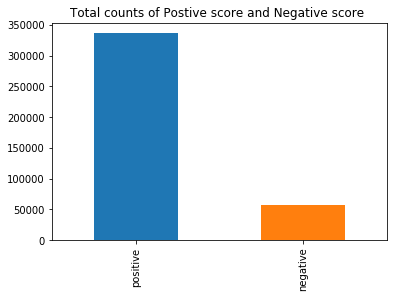

In [8]:
a=final['Score'].value_counts().tolist()
print('List of total counts Postive score and Negative score ==>',a)
final['Score'].value_counts().plot(kind='bar')
plt.title('Total counts of Postive score and Negative score ')


#### observations
* The positive reviews is greater than negative reviews.It makes data imbalanced.
* From the bar plot ,it is seen that sampled datasets of review is imbalnced.


# Text Preprocessing:

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
 
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>$< /><')
    #cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


cleaning html tags like" <.*?>" and punctuations like " r'[?|!|\'|"|#]',r''" from senetences

In [11]:
#final = final.sample(frac=0.004,random_state=0)
#print(final.shape)

In [14]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase.

'''Pre processing of text data:It is cleaning and flitering text'''
i=0
str1=' '
global final_string
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")

    final_string.append(str1)
    i+=1
print('all_positive_words =',len(all_positive_words))
print('all_negative_words =',len(all_negative_words))

# Finding most frequently occuring Positive and Negative words 

freq_positive=nltk.FreqDist(all_positive_words)

freq_negative=nltk.FreqDist(all_negative_words)

print("\nMost Common Positive Words : ",freq_positive.most_common(20))

print("\nMost Common Negative Words : ",freq_negative.most_common(20))




all_positive_words = 12908031
all_negative_words = 2338974

Most Common Positive Words :  [(b'like', 159742), (b'tast', 148220), (b'flavor', 124991), (b'good', 124949), (b'use', 114020), (b'love', 112681), (b'product', 112391), (b'great', 107709), (b'one', 106238), (b'tri', 95717), (b'tea', 91571), (b'coffe', 88533), (b'make', 81463), (b'get', 80711), (b'food', 70743), (b'would', 66136), (b'amazon', 62151), (b'time', 60604), (b'buy', 60076), (b'realli', 59528)]

Most Common Negative Words :  [(b'tast', 34433), (b'like', 32256), (b'product', 29435), (b'one', 20379), (b'flavor', 19479), (b'would', 17893), (b'tri', 17664), (b'use', 15260), (b'good', 14940), (b'coffe', 14602), (b'get', 13747), (b'buy', 13673), (b'order', 12829), (b'food', 12692), (b'dont', 11677), (b'tea', 11606), (b'amazon', 11230), (b'even', 10975), (b'box', 10779), (b'make', 9810)]


#### Observation

* all_positive_words =12908031and all_negative_words= 2338974.
* If any reviews contains any words among in all_positive_words ,then reviews is considered as postive reviews.
* Also,If any reviews contains any words among in all_negative_words ,then reviews is considered as negative  reviews.
* NLTK in python has a function FreqDist which gives you the frequency of words within a text.Using it, freq_positive and freq_negative are calculated.
* Most common postive words and negative owrds are shown above.

##### Dumping and loading  Pre processing of text data in pickle file 

In [15]:
pickle_path_final_string='final_string.pkl'
final_string_file=open(pickle_path_final_string,'wb')
pickle.dump(final_string,final_string_file)
final_string_file.close()

In [11]:
pickle_path_final_string='final_string.pkl'
final_string_unpkl=open(pickle_path_final_string,'rb')
final_string=pickle.load(final_string_unpkl)

In [12]:

final['CleanedText']=final_string
#adding a column of CleanedText which displays the data after pre-processing of the review 
Pre_Process_Data = final[['CleanedText','Score','Time']] 

X_Text=Pre_Process_Data ['CleanedText']

Y_Score =Pre_Process_Data ['Score'] # positive or negative score
print('\nPre_Process_Text_Data  X_Text=',X_Text.shape)
print('\nPre_Process_Score_Data Y_Score=',Y_Score.shape)



Pre_Process_Text_Data  X_Text= (393931,)

Pre_Process_Score_Data Y_Score= (393931,)


In [13]:
# postive and negtive reviews from original datasets of amazon
pos_final = Pre_Process_Data[Pre_Process_Data.Score == 'positive']# postive reviews
pos_final = pos_final.sample(frac=0.3)
print(pos_final.Score.value_counts())

neg_final = Pre_Process_Data[Pre_Process_Data.Score == 'negative'] # negative reviews
print(neg_final.Score.value_counts())

positive    101047
Name: Score, dtype: int64
negative    57107
Name: Score, dtype: int64


In [14]:
final_pos_neg = pd.concat([pos_final,neg_final],axis=0)

print(len(final_pos_neg))
print(type(final_pos_neg))
#print('final_pos_neg=',final_pos_neg['Score'])

158154
<class 'pandas.core.frame.DataFrame'>


In [15]:
print(final_pos_neg.columns)

Index(['CleanedText', 'Score', 'Time'], dtype='object')


### Splitting Training and Testing dataset based on Timeting dataset

In [16]:
# splitting training and testing dataset

X1 = final_pos_neg[['CleanedText','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#100k data sample
X=X1[:100000]
print(X.shape)
#100k data sample
Y1 = final_pos_neg[['Score','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
### Splitting Training and Testing dataset based on Time
Y=Y1[:100000]
print(Y.shape)
## 70 % of data
tt =math.ceil(len(X)*.7)
print(tt)

X_train_data =  X[:tt] 
X_train_data  = X_train_data
print('X_train_data ',X_train_data.shape)
X_test_data = X[tt:]
X_test_data = X_test_data
print('X_test_data ',X_test_data.shape )
Y_train_data = Y[:tt]
Y_train_data  = Y_train_data
print('Y_train_data ',Y_train_data .shape)
Y_test_data = Y[tt:]
Y_test_data= Y_test_data
print('Y_test_data ',Y_test_data .shape)



(100000, 1)
(100000, 1)
70000
X_train_data  (70000, 1)
X_test_data  (30000, 1)
Y_train_data  (70000, 1)
Y_test_data  (30000, 1)


In [17]:
Train_data=Y_train_data.values.ravel()
Y_test_data= Y_test_data.values.ravel()


#  Optimal aplha for Naive Bayes

In [32]:
 # Time seris splitting Cross-Validation
tscv = TimeSeriesSplit(n_splits=10)

In [33]:
#  alpha_nb is function to calculate the alpha value for naive bayes
from sklearn.naive_bayes import MultinomialNB
def alpha_nb(X_train,y_train, My_List):
   
    alpha_value = list(filter(lambda x: x % 2 != 0, My_List))

    # empty list that will hold cv scores
    cv_scores = []
    
    # perform Time seris splitting  cross validation
    for i in alpha_value:
        nb_classifier = MultinomialNB(alpha= i, fit_prior=True)
        scores = cross_val_score(nb_classifier, X_train, y_train, cv=tscv, scoring='accuracy',n_jobs=-1)
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha value
    global best_alpha_value
    best_alpha_value = alpha_value[MSE.index(min(MSE))]
    print('\nThe best value of alpha is %d.' % best_alpha_value)
  
      # plot misclassification error vs alpha 
    fig = plt.figure( facecolor='y', edgecolor='k',figsize=(15,8))
  
    plt.semilogx(alpha_value, MSE,'m*',linestyle='dashed', label='depthsize')
    plt.legend(loc='lower left')
    plt.grid()
    for xy in zip(alpha_value, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title('Error_Rate vs. alpha_Value')
    plt.xlabel('Number of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each alpha value is : ", np.round(MSE,3))
    
    
    
    
    return best_alpha_value

##### Pandas dataframe to markdown Table format

In [34]:
# result_display  is function to convert dataframe 
# into table format in Markdown
def result_display(df):
    writer = pytablewriter.MarkdownTableWriter()
    #writer.table_name = name
    writer.header_list = list(df.columns.values)
    writer.value_matrix = df.values.tolist()
    writer.write_table()


    

# Methods to convert text into vector

Methods:
* Bag of Words
* Avg word2vec
* Tf-idf
* tf-idf weighted Word2Vec

Using above four method is used to convert text to numeric vector.

# 1. Bag of Words (BoW)

##### BOW for Training Data

In [35]:
count_vect = CountVectorizer() #in scikit-learn
#vector of train data
Data = count_vect.fit_transform(X_train_data.values.ravel())
Data.get_shape()
sc_data= StandardScaler(with_mean=False).fit_transform(Data )
final_data= preprocessing.normalize(sc_data)
print(final_data.shape)
#Normalize Data


warnings.filterwarnings("ignore") 

(70000, 31904)


#### Dumping & Loading Pickle file for training data ( BOW )


In [36]:
#Pickle file for training data

pickle_path_BOW_train='X_train_data_BOW.pkl'
X_train_data_BOW=open(pickle_path_BOW_train,'wb')
pickle.dump(final_data ,X_train_data_BOW)
X_train_data_BOW.close()


In [37]:
pickle_path_BOW_train='X_train_data_BOW.pkl'
unpickle_path1=open(pickle_path_BOW_train,'rb')
final_data=pickle.load(unpickle_path1)

##### BOW for Testing Data

In [38]:
#vector of test data
final_data1=count_vect.transform(X_test_data.values.ravel())
#print(final_data1)
final_data_test1 = StandardScaler(with_mean=False).fit(final_data1)

final_data_test11=final_data_test1.transform(final_data1)
final_data_test= preprocessing.normalize(final_data_test11)
print(final_data_test.shape)

(30000, 31904)


#### Dumping & Loading Pickle file for testing data ( BOW) 

In [39]:
pickle_path_BOW_test='X_test_data_BOW.pkl'
X_test_data_BOW=open(pickle_path_BOW_test,'wb')
pickle.dump(final_data_test ,X_test_data_BOW)
X_test_data_BOW.close()

In [40]:
pickle_path_BOW_test='X_test_data_BOW.pkl'
unpickle_path2=open(pickle_path_BOW_test,'rb')
final_data_test=pickle.load(unpickle_path2)

 Featured data of Bag of words is Standardization (mean=0 and std.dev=1).

### Optimal aplha using BOW


The best value of alpha is 1.


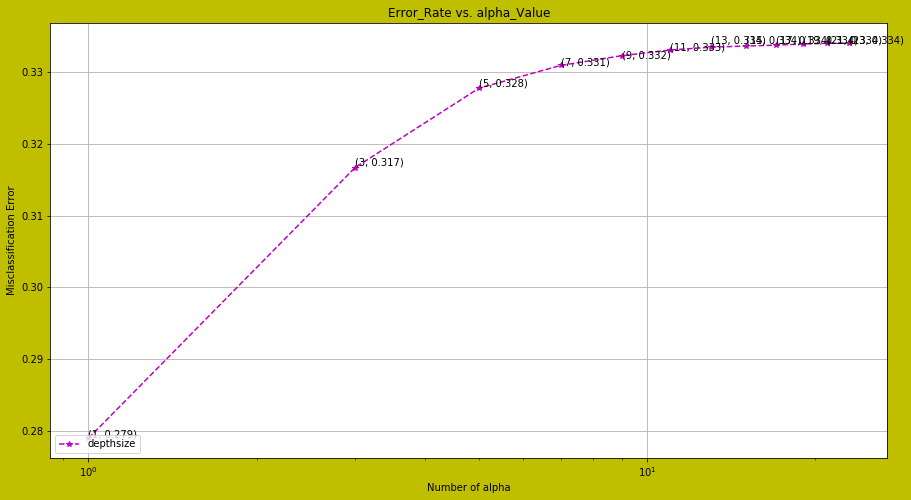

the misclassification error for each alpha value is :  [0.279 0.317 0.328 0.331 0.332 0.333 0.334 0.334 0.334 0.334 0.334 0.334]


In [41]:
# To get Optimal aplha using BOW

My_List1 = list(range(0,25)) 

alphaNB = alpha_nb(final_data ,Train_data ,My_List1)

## Naive Bayes classifier for optimal alpha (BOW)

In [42]:
#  Naive Bayes classifier
nb1 = MultinomialNB(alpha=best_alpha_value , fit_prior=True)
%time nb1.fit(final_data,Train_data)

prediction1 = nb1.predict(final_data_test)


CPU times: user 236 ms, sys: 0 ns, total: 236 ms
Wall time: 233 ms


In [43]:
#Training accuracy and training error
training_score=nb1.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.8409285714285715
training error is = 0.15907142857142853


In [44]:
# Testing Accuracy and testing error for Naive Bayes model

Testing_score=round(accuracy_score(Y_test_data ,prediction1),5)
print("Accuracy for Naive Bayes model with Bag of words is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Naive Bayes model with Bag of words is = ",Testing_error)

Accuracy for Naive Bayes model with Bag of words is =  0.7335
Testing error for Naive Bayes model with Bag of words is =  0.26649999999999996


In [45]:
F1_score = round(f1_score(Y_test_data ,prediction1,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction1,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction1,average='macro'),5)*100

In [46]:
print(classification_report( Y_test_data,prediction1))

             precision    recall  f1-score   support

   negative       0.84      0.38      0.52     11445
   positive       0.71      0.95      0.82     18555

avg / total       0.76      0.73      0.70     30000



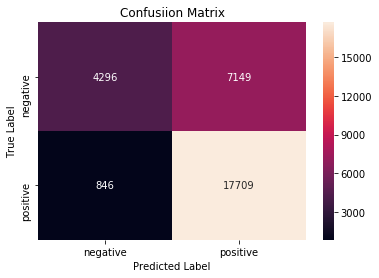

In [47]:
cm = confusion_matrix(Y_test_data ,prediction1)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [48]:
models_performence = {
    'Model':['Naive Bayes'],
    'Optimal_aplha': [best_alpha_value],
    'Vectorizer': ['BoW'],
    'Training_error':[training_error*100],
    'Test_error':[Testing_error*100], 
    'Accuracy':[Testing_score],
    'F1':[F1_score],
    'recall':[recall],
    'precision':[precision]
    
  
}

In [49]:
columns = ["Model", "Vectorizer","Optimal_aplha", "Training_error",  "Test_error",
           "Accuracy","F1","recall","precision",
          ]
df1=pd.DataFrame(models_performence, columns=columns)

In [50]:
result_display(df1)

|   Model   |Vectorizer|Optimal_aplha|Training_error|Test_error|Accuracy| F1  |recall|precision|
|-----------|----------|------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Naive Bayes|BoW       |            1|         15.91|     26.65|  0.7335|66.69| 66.49|    77.39|



|   Model   |Vectorizer|Optimal_aplha|Training_error|Test_error|Accuracy| F1  |recall|precision|
|-----------|----------|------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Naive Bayes|BoW       |            1|         15.91|     26.65|  0.7335|66.69| 66.49|    77.39|


# Observations
* Best value of alpha for naive bayes is 1.
* From MSE error graph, Error rate gradually is increased  as alpha increased after that it gradually decresing.  
* All metrics value is as shown above.
* Accuracy for Naive bayes model with Bag of words is  73.35%
* but precision for Naive bayes model with Bag of words is 77.39%. Precision metrics gives high performance of model.
* confusion metrix shows that model perfomance well. Model is neither dumb or sensible model.

* TPR is high .

 

# 2. TF-IDF


In [51]:
##### TF-IDF for Training data

In [52]:

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(X_train_data.values.ravel())
final_tf_idf.get_shape()

(70000, 996854)

In [53]:
sc_data2= StandardScaler(with_mean=False).fit_transform(final_tf_idf)
final_tfidf_np= preprocessing.normalize(sc_data2)
print("Train Data: ",final_tfidf_np.shape)

Train Data:  (70000, 996854)


In [54]:
features = tf_idf_vect.get_feature_names()
len(features)

996854

#### Dumping & Loading Pickle file for training data (TF-IDF)

In [55]:
pickle_path_tfidf_train='X_train_data_tfidf.pkl'
X_train_data_tfidf=open(pickle_path_tfidf_train,'wb')
pickle.dump(final_tfidf_np ,X_train_data_tfidf)
X_train_data_tfidf.close()

In [56]:
pickle_path_tfidf_train='X_train_data_tfidf.pkl'
unpickle_path5=open(pickle_path_tfidf_train,'rb')
final_tfidf_np=pickle.load(unpickle_path5)

##### tf-idf For Testing datasets 

In [57]:
final_tf_idf_test1 = tf_idf_vect.transform(X_test_data.values.ravel())
final_tf_idf_test1.get_shape()

(30000, 996854)

In [58]:
final_tf_idf_test1_f=StandardScaler(with_mean=False).fit(final_tf_idf_test1 )
print(final_tf_idf_test1_f)

final_tf_idf_test11=final_tf_idf_test1_f.transform(final_tf_idf_test1 )
#Normalize Data
final_tfidf_np_test= preprocessing.normalize(final_tf_idf_test11)
print("Test Data: ",final_tfidf_np_test.shape)


StandardScaler(copy=True, with_mean=False, with_std=True)
Test Data:  (30000, 996854)


#### Dumping & Loading Pickle file for testing data(TF-IDF)

In [59]:

pickle_path_tfidf_test='X_test_data_tfidf.pkl'
X_test_data_tfidf=open(pickle_path_tfidf_test,'wb')
pickle.dump(final_tfidf_np_test ,X_test_data_tfidf)
X_test_data_tfidf.close()

In [60]:
pickle_path_tfidf_test='X_test_data_tfidf.pkl'
unpickle_path6=open(pickle_path_tfidf_test,'rb')
final_tfidf_np_test=pickle.load(unpickle_path6)


The best value of alpha is 1.


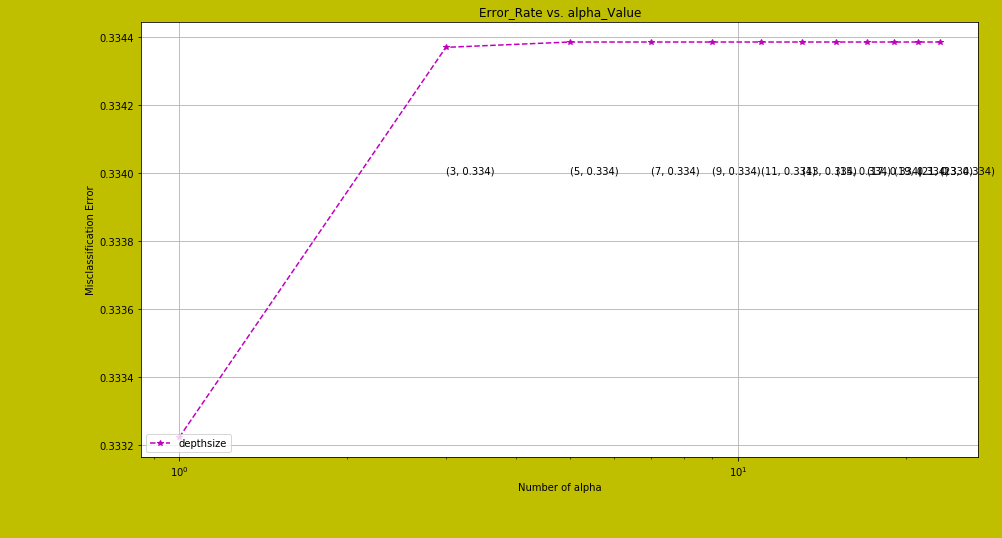

the misclassification error for each alpha value is :  [0.333 0.334 0.334 0.334 0.334 0.334 0.334 0.334 0.334 0.334 0.334 0.334]


In [61]:
My_List3 = list(range(0,25))

alphaNB = alpha_nb(final_tfidf_np ,Train_data,My_List3)

## Naive Bayes classifier for optimal alpha (TF-IDF)

In [62]:
nb3 = MultinomialNB(alpha=best_alpha_value , fit_prior=True)
%time nb3.fit(final_tfidf_np ,Train_data)

prediction3 = nb3.predict(final_tfidf_np_test)




CPU times: user 320 ms, sys: 16 ms, total: 336 ms
Wall time: 333 ms


In [63]:
#Training accuracy and training error
training_score=nb3.score(final_tfidf_np,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.9673
training error is = 0.03269999999999995


In [64]:
# Testing Accuracy and testing error for Naive Bayes model

Testing_score=round(accuracy_score(Y_test_data ,prediction3),5)
print("Accuracy for Naive Bayes model with TF-IDF is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Naive Bayes  model with TF-IDF is = ",Testing_error)

Accuracy for Naive Bayes model with TF-IDF is =  0.64147
Testing error for Naive Bayes  model with TF-IDF is =  0.35853


In [65]:
F1_score = round(f1_score(Y_test_data ,prediction3,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction3,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction3,average='macro'),5)*100

In [66]:
print(classification_report( Y_test_data,prediction3))

             precision    recall  f1-score   support

   negative       0.99      0.06      0.12     11445
   positive       0.63      1.00      0.78     18555

avg / total       0.77      0.64      0.52     30000



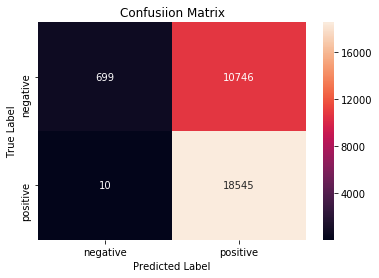

In [67]:
cm = confusion_matrix(Y_test_data ,prediction3)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
models_performence['Model'].append('Naive Bayes')
models_performence['Vectorizer'].append('TF-IDF')
models_performence[ 'Optimal_aplha'].append(best_alpha_value)
models_performence['Training_error'].append(training_error*100)
models_performence[ 'Test_error'].append(Testing_error*100)
models_performence[ 'Accuracy'].append(Testing_score)
models_performence[ 'F1'].append(F1_score)
models_performence['recall'].append(recall)
models_performence[ 'precision'].append(precision)


In [69]:
columns = ["Model", "Vectorizer","Optimal_aplha", "Training_error",  "Test_error",
           "Accuracy","F1","recall","precision",
          ]
df2=pd.DataFrame(models_performence, columns=columns)

In [70]:
result_display(df2)

|   Model   |Vectorizer|Optimal_aplha|Training_error|Test_error|Accuracy| F1  |recall|precision|
|-----------|----------|------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Naive Bayes|BoW       |            1|        15.907|     26.65|  0.7335|66.69| 66.49|    77.39|
|Naive Bayes|TF-IDF    |            1|         3.270|     35.85|  0.6415|44.51| 53.03|    80.95|



|   Model   |Vectorizer|Optimal_aplha|Training_error|Test_error|Accuracy| F1  |recall|precision|
|-----------|----------|------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Naive Bayes|BoW       |            1|        15.907|     26.65|  0.7335|66.69| 66.49|    77.39|
|Naive Bayes|TF-IDF    |            1|         3.270|     35.85|  0.6415|44.51| 53.03|    80.95|

#### Observations 
* The best value of alpha for naive bayes model using tf-idf is 1
* MSE = 3.270 @ alpha =1. 
* When alpha increased from value=1 , error rate is gradually increased and then error rate is constant
* precision for Naive bayes model with TF-IDF is  80.95 and Accuracy for Naive bayes model with TF-IDF is  64.45% . Model performs well for scoring metrics "precision"
* confusion matrix is shown above.TPR and FNR is high as compared to FPR,TNR.
* TPR and FNR (true postive rate and false negative rate) is almost similar.
* false negative rate is high .It means it is predicting  postive words as a negative words.


## Feature Importance in Naive Bayes

#### Feature importance using count_vect

In [71]:
#### Feature importance using count_vect
neg_class_FI1 = nb1.feature_log_prob_[0, :]

print(neg_class_FI1)
pos_class_FI1 = nb1.feature_log_prob_[1, :]
print(pos_class_FI1)


[-10.90135043 -11.56576329 -11.56576329 ... -11.56576329 -11.56576329
 -10.87742632]
[-12.09553814 -11.4764334  -11.43187564 ... -11.83734787 -11.41230917
 -12.09553814]


Top 10 negative class feature poe          -11.565763
expedi       -11.565763
repolac      -11.565763
reposado     -11.565763
expen        -11.565763
expenditur   -11.565763
expenis      -11.565763
expenisv     -11.565763
expensvi     -11.565763
superfici    -11.565763
dtype: float64


Text(0,0.5,'log probability for Negative class ')

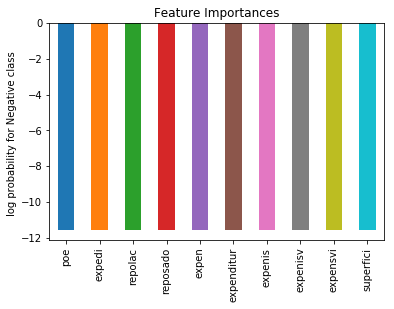

In [72]:
#Feature Importances for negative class
count_features=count_vect.get_feature_names()
feat_imp = pd.Series(neg_class_FI1, count_features).sort_values(ascending=False)
print("Top 10 negative class feature",feat_imp[:-(10 + 1):-1])

feat_imp[:-(10 + 1):-1].plot(kind='bar', title='Feature Importances')
plt.ylabel('log probability for Negative class ')


Top 10 postive class feature great    -5.792588
love     -5.893321
good     -6.002175
tast     -6.210854
best     -6.259056
like     -6.283491
flavor   -6.350837
price    -6.414177
buy      -6.464493
find     -6.468976
dtype: float64


Text(0,0.5,'log probability for Positive class ')

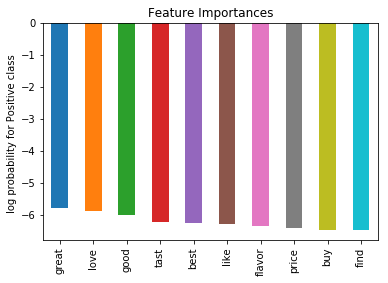

In [73]:
#Feature Importances for postive class using count_vect
count_features=count_vect.get_feature_names()
feat_imp = pd.Series(pos_class_FI1, count_features).sort_values(ascending=False)
print("Top 10 postive class feature",feat_imp[:10])

feat_imp[:10].plot(kind='bar', title='Feature Importances')
plt.ylabel('log probability for Positive class ')


#### Feature importance using tf-idf -vect

In [74]:
#### Feature importance using tf-idf -vect
neg_class_FI3 = nb3.feature_log_prob_[0, :] # Class 0
print(neg_class_FI3)

pos_class_FI3 = nb3.feature_log_prob_[1, :]# class 1
print(pos_class_FI3)



[-13.72689799 -13.72689799 -13.92294808 ... -13.92294808 -13.64473217
 -13.64473217]
[-14.01687757 -14.01687757 -13.78105699 ... -13.79513024 -14.01687757
 -14.01687757]


Top 10 negative class feature linol fatti        -13.922948
kind exact         -13.922948
kind excel         -13.922948
tahini primarili   -13.922948
kind expresso      -13.922948
tahini noth        -13.922948
kind extrud        -13.922948
tahini make        -13.922948
tahini liquid      -13.922948
tahini lime        -13.922948
dtype: float64


Text(0,0.5,'log probability for Negative class ')

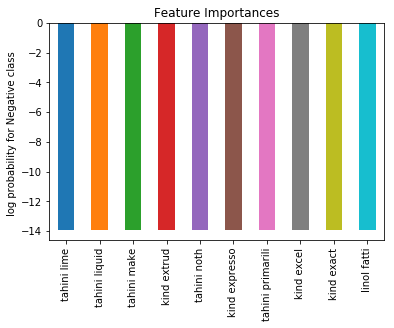

In [75]:
#Feature Importances
tfidf_features=tf_idf_vect .get_feature_names()
feat_imp = pd.Series(neg_class_FI3 , tfidf_features).sort_values(ascending=False)
print("Top 10 negative class feature",feat_imp[-10:])

feat_imp[-10:].plot(kind='bar', title='Feature Importances')
plt.ylabel('log probability for Negative class ')


Top 10 negative class feature great     -10.256840
love      -10.293066
good      -10.345897
tast      -10.459355
like      -10.499123
flavor    -10.563169
best      -10.633156
product   -10.644347
use       -10.656839
one       -10.687674
dtype: float64


Text(0,0.5,'log probability for Negative class ')

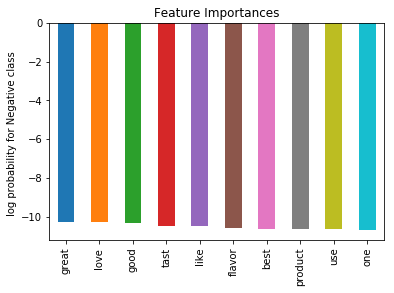

In [76]:
feat_imp = pd.Series(pos_class_FI3  , tfidf_features).sort_values(ascending=False)
print("Top 10 negative class feature",feat_imp[:10])

feat_imp[:10].plot(kind='bar', title='Feature Importances')
plt.ylabel('log probability for Negative class ')


#### Observations
* Feature importance for Naive bayes is importance words/features in determing that words belongs to positive class or negative class.
* Top 15 Important postive words that belongs to postive class and top 15 negative words that belongs to negative class with highest probabiltyis shown above.


# Conclusions

|   Model   |Vectorizer|Optimal_aplha|Training_error|Test_error|Accuracy| F1  |recall|precision|
|-----------|----------|------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Naive Bayes|BoW       |            1|        15.907|     26.65|  0.7335|66.69| 66.49|    77.39|
|Naive Bayes|TF-IDF    |            1|         3.270|     35.85|  0.6415|44.51| 53.03|    80.95|



* Confusion matrix for BOW is best comapratively with confudion matrix for TF_IDF.
* TPR and TNR for bow is high while FPR & FNR is almost similar.
* TPR & TNR is good in TF_IDF but FPR & TNR is almost similar which is not good foramazon reviews case.
* MSE Graph for BOW gradually decresing and then remains constant whlie in TF-IDF MSE graph is gradually increasing and then remains high & constant.
* Above table describes the performance of Naive bayes.
* As seen in conclusion table,naive Bayes using Tf-IDF Vectorizer [accuracy,F1 , recall and precision ] values is comparatively good  with naive Bayes using BOW.But NB model leads to overfitiing.
* AS Training error is small and Testing error is comparatively high in Tf-Idf NB model, model is overfitting.
* After  comparing the  all  developed models, Naive Bayes model with Bag of words is the best to predict the polarity of reviews among all models. 

